In [68]:
import numpy as np
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

In [69]:
df_X=diabetes.data
df_y=diabetes.target

print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [70]:
df_X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [71]:
X = np.array(df_X)
y = np.array(df_y)

In [72]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [82]:
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    return np.dot(X,W) + b


In [83]:
def loss(X, W, b, y):
    return np.mean((y-model(X, W, b))**2)

In [84]:
def gradient(X, W, b, y):
    N = len(y)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    
    db = 2 * (y_pred - y).mean()
    return dW, db

learning_rate = 0.1

In [85]:
losses = []

for i in range(1, 30001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW
    b -= learning_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 5317.7208
Iteration 200 : Loss 4794.4224
Iteration 300 : Loss 4414.7570
Iteration 400 : Loss 4135.1784
Iteration 500 : Loss 3925.8029
Iteration 600 : Loss 3766.0739
Iteration 700 : Loss 3641.8074
Iteration 800 : Loss 3543.1779
Iteration 900 : Loss 3463.3452
Iteration 1000 : Loss 3397.5175
Iteration 1100 : Loss 3342.3113
Iteration 1200 : Loss 3295.3151
Iteration 1300 : Loss 3254.7899
Iteration 1400 : Loss 3219.4648
Iteration 1500 : Loss 3188.3965
Iteration 1600 : Loss 3160.8729
Iteration 1700 : Loss 3136.3462
Iteration 1800 : Loss 3114.3869
Iteration 1900 : Loss 3094.6519
Iteration 2000 : Loss 3076.8620
Iteration 2100 : Loss 3060.7859
Iteration 2200 : Loss 3046.2294
Iteration 2300 : Loss 3033.0267
Iteration 2400 : Loss 3021.0352
Iteration 2500 : Loss 3010.1305
Iteration 2600 : Loss 3000.2038
Iteration 2700 : Loss 2991.1588
Iteration 2800 : Loss 2982.9102
Iteration 2900 : Loss 2975.3820
Iteration 3000 : Loss 2968.5060
Iteration 3100 : Loss 2962.2215
Iteration 3200 : 

In [86]:
W, b

(array([  10.77482453, -213.08889235,  514.04422601,  280.4446647 ,
        -106.17650117, -131.17996969, -187.74607085,   89.18118761,
         517.75908271,  106.90372167]),
 151.44285435610604)

In [87]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2916.407891831756

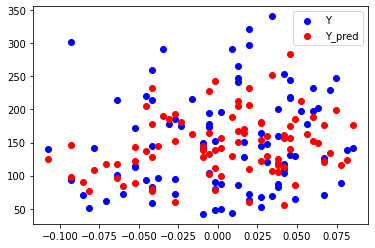

In [90]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test, label='Y', color='b')
plt.scatter(X_test[:, 0], prediction, label='Y_pred', color='r')
plt.legend()
plt.show()